In [13]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px


In [9]:
diabetes = pd.read_csv('data/diabetes.csv')

Загрузите его к себе в ноутбук, охарактеризуйте имеющиеся колонки и число наблюдений. Проанализируйте, какие факторы связаны с развитием диабета, а какие нет.

In [10]:
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


Pragnancies - беременность 
Glucose - уровень глюкозы крови; 
BloodPressure - артериальное давление; 
SkinThickness - величина кожной склакди;
Insulin - инсулин;
BMI - индекс массы тела;
DiabetesPedigreeFunction - отягощенный семейный анамнез;
Age - возраст;
Outcome- подтвержденный диагноз СД.

Всего 768 наблюдений


In [11]:
diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [6]:
diabetes['Outcome'] = diabetes['Outcome'].astype('category')

<AxesSubplot: >

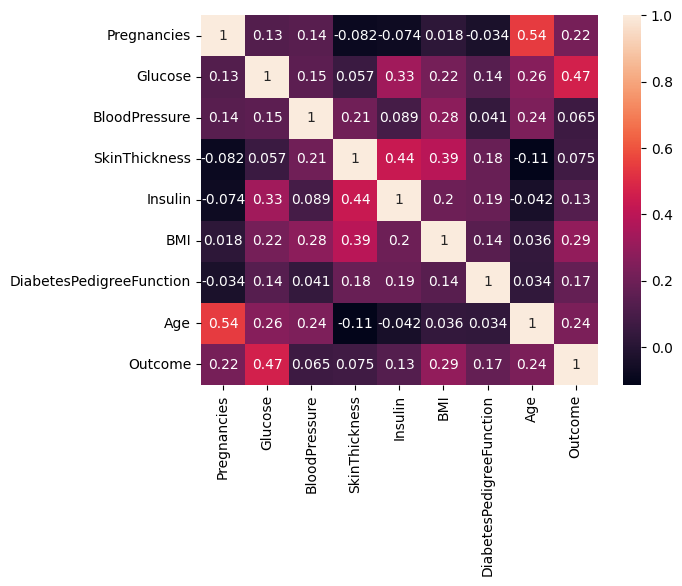

In [23]:
sns.heatmap(diabetes.corr(), annot= True)

С развитием диабета связан следующие признаки: Age, Glucose, Insulin, BMI, Pregnancies

In [28]:
colum =['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']

In [35]:
mask_diabet = diabetes['Outcome'] == 1
diabet_outcome = diabetes[mask_diabet]
diabet_outcome.sort_values(
    by = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness',
     'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age'],
    ascending= True)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
109,0,95,85,25,36,37.4,0.247,24,1
448,0,104,64,37,64,33.6,0.510,22,1
129,0,105,84,0,0,27.9,0.741,62,1
291,0,107,62,30,74,36.6,0.757,25,1
66,0,109,88,30,0,32.5,0.855,38,1
...,...,...,...,...,...,...,...,...,...
691,13,158,114,0,0,42.3,0.257,44,1
298,14,100,78,25,184,36.6,0.412,46,1
455,14,175,62,30,0,33.6,0.212,38,1
88,15,136,70,32,110,37.1,0.153,43,1


In [55]:
dieabet_plot = diabetes.groupby('Outcome')[['DiabetesPedigreeFunction','Glucose','Insulin', 'BMI', 'Age']].mean()

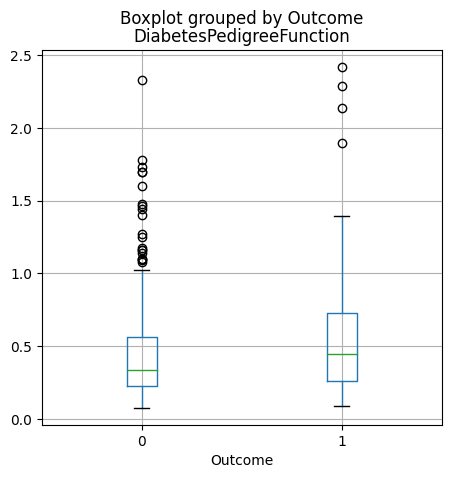

In [63]:
boxplot = diabetes.boxplot(
    column='DiabetesPedigreeFunction' , 
    by = 'Outcome',
    figsize=(5,5)
)

                    ВТОРОЙ ДАТАСЕТ
                    

In [148]:
train = pd.read_csv('data/train.csv')
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3390 entries, 0 to 3389
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               3390 non-null   int64  
 1   age              3390 non-null   int64  
 2   education        3303 non-null   float64
 3   sex              3390 non-null   object 
 4   is_smoking       3390 non-null   object 
 5   cigsPerDay       3368 non-null   float64
 6   BPMeds           3346 non-null   float64
 7   prevalentStroke  3390 non-null   int64  
 8   prevalentHyp     3390 non-null   int64  
 9   diabetes         3390 non-null   int64  
 10  totChol          3352 non-null   float64
 11  sysBP            3390 non-null   float64
 12  diaBP            3390 non-null   float64
 13  BMI              3376 non-null   float64
 14  heartRate        3389 non-null   float64
 15  glucose          3086 non-null   float64
 16  TenYearCHD       3390 non-null   int64  
dtypes: float64(9),

In [149]:
cols_null_percent = train.isnull().mean() * 100
cols_with_null = cols_null_percent[
    cols_null_percent > 0
].sort_values(ascending=True)
cols_with_null

heartRate     0.029499
BMI           0.412979
cigsPerDay    0.648968
totChol       1.120944
BPMeds        1.297935
education     2.566372
glucose       8.967552
dtype: float64

In [150]:
train_copy = train.copy()
n = train_copy.shape[0] #число строк в таблице
thresh_usl = n*0.7
train_copy = train_copy.dropna(thresh=thresh_usl, axis=1)
m = train_copy.shape[1] #число признаков после удаления столбцов
train_copy = train_copy.dropna(thresh=m-2, axis=0)
train_copy.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 3389 entries, 0 to 3389
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               3389 non-null   int64  
 1   age              3389 non-null   int64  
 2   education        3302 non-null   float64
 3   sex              3389 non-null   object 
 4   is_smoking       3389 non-null   object 
 5   cigsPerDay       3367 non-null   float64
 6   BPMeds           3346 non-null   float64
 7   prevalentStroke  3389 non-null   int64  
 8   prevalentHyp     3389 non-null   int64  
 9   diabetes         3389 non-null   int64  
 10  totChol          3352 non-null   float64
 11  sysBP            3389 non-null   float64
 12  diaBP            3389 non-null   float64
 13  BMI              3375 non-null   float64
 14  heartRate        3388 non-null   float64
 15  glucose          3086 non-null   float64
 16  TenYearCHD       3389 non-null   int64  
dtypes: float64(9),

In [151]:
cols_null_percent = train_copy.isnull().mean() * 100
cols_with_null = cols_null_percent[
    cols_null_percent > 0
].sort_values(ascending=True)
cols_with_null

heartRate     0.029507
BMI           0.413101
cigsPerDay    0.649159
totChol       1.091767
BPMeds        1.268811
education     2.567129
glucose       8.940690
dtype: float64

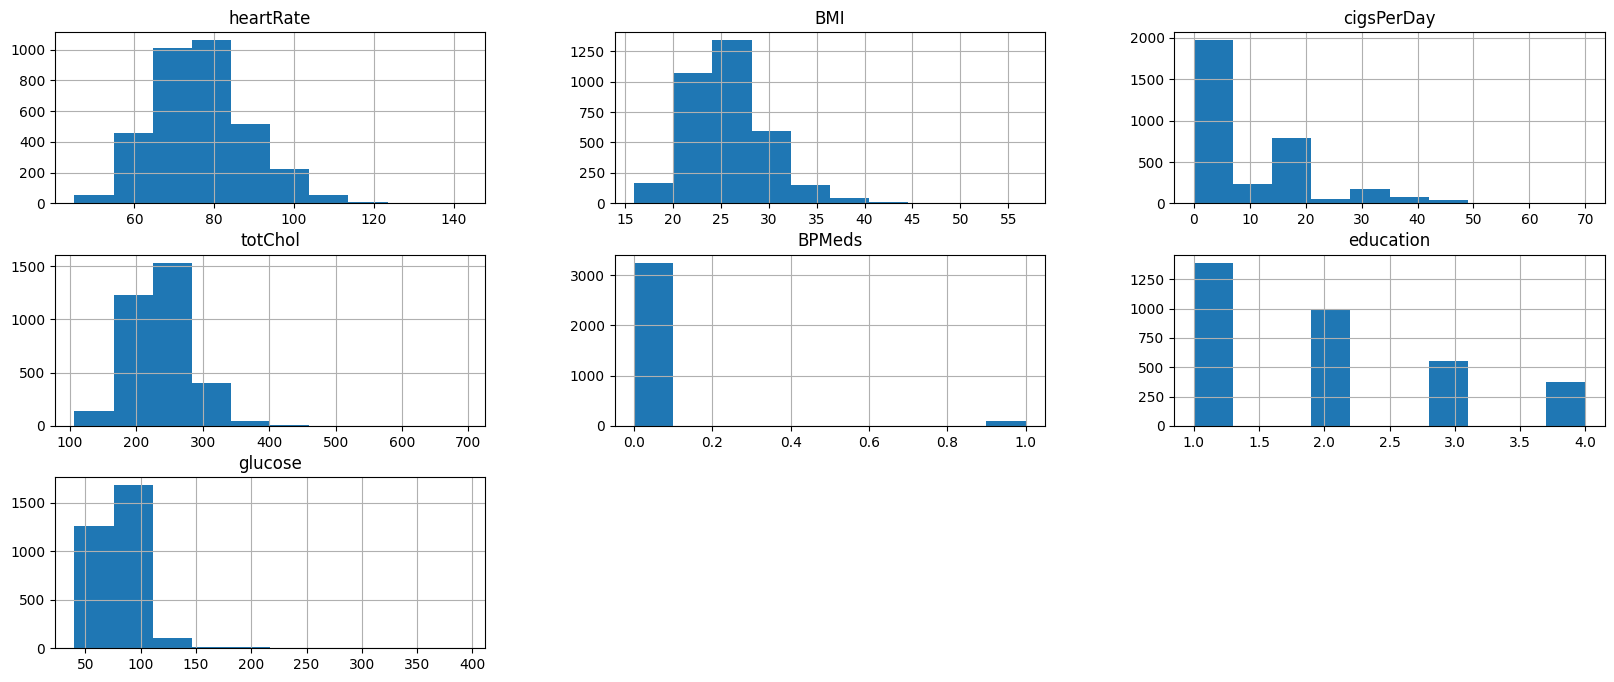

In [154]:
cols = cols_with_null.index
train_copy[cols].hist(figsize=(20, 8));

Судя по распределениям признаки Glucose, totChol, BMI - близки к логонармальным - их заполняем медианой!
Признаки heartRate, cigsPerDay, education - попробуем заполнить модой.

<AxesSubplot: >

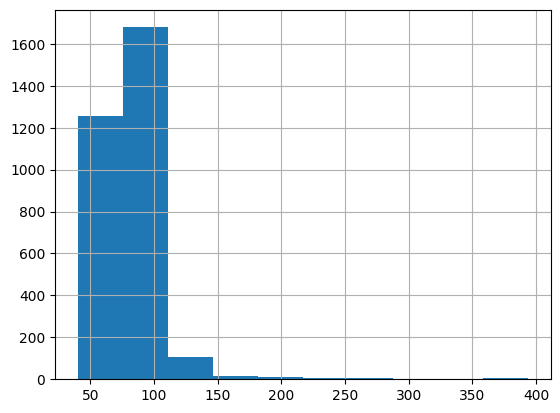

In [152]:
train_copy['glucose'].hist()

 У глюкозы распределение близкое к логонормальному, поэтому пропуски заполняет медианой
 

In [155]:
train_copy.columns

Index(['id', 'age', 'education', 'sex', 'is_smoking', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')

In [168]:
values = {
    'glucose': train_copy['glucose'].median(),
    'totChol': train_copy['totChol'].median(),
    'BMI': train_copy['BMI'].median(),
    'heartRate': train_copy['heartRate'].mode()[0],
    'cigsPerDay': train_copy['cigsPerDay'].mode()[0],
    'education': train_copy['education'].mode()[0],
    'BPMeds': train_copy['BPMeds'].mode()[0]
}
train_copy = train_copy.fillna(values)
train_copy.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 3389 entries, 0 to 3389
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               3389 non-null   int64  
 1   age              3389 non-null   int64  
 2   education        3389 non-null   float64
 3   sex              3389 non-null   object 
 4   is_smoking       3389 non-null   object 
 5   cigsPerDay       3389 non-null   float64
 6   BPMeds           3389 non-null   float64
 7   prevalentStroke  3389 non-null   int64  
 8   prevalentHyp     3389 non-null   int64  
 9   diabetes         3389 non-null   int64  
 10  totChol          3389 non-null   float64
 11  sysBP            3389 non-null   float64
 12  diaBP            3389 non-null   float64
 13  BMI              3389 non-null   float64
 14  heartRate        3389 non-null   float64
 15  glucose          3389 non-null   float64
 16  TenYearCHD       3389 non-null   int64  
dtypes: float64(9),

In [182]:
train_copy = train_copy.drop(['id'], axis=1)

KeyError: "['id'] not found in axis"

In [189]:
train_copy['sex'] = train_copy['sex'].astype('category')
train_copy['is_smoking'] = train_copy['is_smoking'].astype('category')

In [197]:
train_copy.groupby('TenYearCHD')[['glucose','diabetes','totChol','is_smoking']]

In [221]:

diabetes = diabetes.rename(columns={'Glucose':'glucose', 'Outcome':'diabetes', 'Age':'age'})


In [222]:
train_copy.head()

,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,64,2.0,F,YES,3.0,0.0,0,0,0,221.0,148.0,85.0,25.38,90.0,80.0,1
1,36,4.0,M,NO,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,46,1.0,F,YES,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0
3,50,1.0,M,YES,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1
4,64,1.0,F,YES,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0


Объединять можно по Глюкозе, BMI, age. Скорее всего более специфичным будет уровень глюкозы.

In [233]:
proba = diabetes.merge(train_copy, on='glucose')
proba.head()

,Pregnancies,glucose,BloodPressure,SkinThickness,Insulin,BMI_x,DiabetesPedigreeFunction,age_x,diabetes_x,age_y,...,BPMeds,prevalentStroke,prevalentHyp,diabetes_y,totChol,sysBP,diaBP,BMI_y,heartRate,TenYearCHD
0,6,148,72,35,0,33.6,0.627,50,1,68,...,0.0,0,1,1,184.0,157.0,97.0,33.16,110.0,1
1,3,148,66,25,0,32.5,0.256,22,0,68,...,0.0,0,1,1,184.0,157.0,97.0,33.16,110.0,1
2,4,148,60,27,318,30.9,0.150,29,1,68,...,0.0,0,1,1,184.0,157.0,97.0,33.16,110.0,1
3,10,148,84,48,237,37.6,1.001,51,1,68,...,0.0,0,1,1,184.0,157.0,97.0,33.16,110.0,1
4,1,85,66,29,0,26.6,0.351,31,0,58,...,0.0,0,1,0,188.0,160.0,120.0,35.58,88.0,0


In [163]:

test1 = pd.read_csv('data/test.csv')
test1[test1['BPMeds'] >0].shape[0]

24

In [181]:
test1


,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose
0,3390,43,2.0,M,YES,35.0,0.0,0,0,0,207.0,117.0,65.0,24.42,60.0,100.0
1,3391,56,3.0,F,NO,0.0,0.0,0,0,0,192.0,122.0,82.5,28.61,68.0,58.0
2,3392,58,1.0,F,YES,20.0,0.0,0,1,0,260.0,180.0,100.0,25.56,100.0,NaN
3,3393,47,3.0,F,NO,0.0,0.0,0,0,0,231.0,102.5,66.0,23.40,70.0,78.0
4,3394,44,1.0,M,NO,0.0,0.0,0,0,0,160.0,118.5,87.0,25.81,54.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
843,4233,46,3.0,F,NO,0.0,0.0,0,0,0,277.0,122.5,77.5,27.42,63.0,77.0
844,4234,58,2.0,F,NO,0.0,0.0,0,0,0,190.0,132.0,67.0,23.08,65.0,70.0
845,4235,55,1.0,M,NO,0.0,0.0,0,0,0,199.0,134.0,80.0,26.41,120.0,NaN
846,4236,45,3.0,F,NO,0.0,0.0,0,1,0,231.0,157.5,104.5,22.86,75.0,92.0
